In [1]:
import csv
import json
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
columns = ['Acc', 'Pr', 'R', 'F1']
#columns = ['test_f1-score_mean']
metric_count = len(columns)

data = {}
with open('../../results/plots/baseline.csv') as f:
    reader = csv.DictReader(f, delimiter=';')
    for row in reader:
        if row['PipelineID'] not in data:
            data[row['PipelineID']] = {}
        data[row['PipelineID']] = [row[key] for key in columns]
data1 = data

data = {}
with open('../../results/plots/bests.csv') as f:
    reader = csv.DictReader(f, delimiter=';')
    for row in reader:
        if row['PipelineID'] not in data:
            data[row['PipelineID']] = {}
        data[row['PipelineID']] = [row[key] for key in columns]
data2 = data

data = {}
with open('../../results/plots/negative_samples.csv') as f:
    reader = csv.DictReader(f, delimiter=';')
    for row in reader:
        if row['PipelineID'] not in data:
            data[row['PipelineID']] = {}
        data[row['PipelineID']] = [row[key] for key in columns]
data3 = data

data = {}
with open('../../results/plots/best_vectorizers.csv') as f:
    reader = csv.DictReader(f, delimiter=';')
    for row in reader:
        if row['PipelineID'] not in data:
            data[row['PipelineID']] = {}
        data[row['PipelineID']] = [row[key] for key in columns]
data4 = data

data = {}
with open('../../results/plots/best_vectorizers_structured.csv') as f:
    reader = csv.DictReader(f, delimiter=';')
    for row in reader:
        if row['PipelineID'] not in data:
            data[row['PipelineID']] = {}
        data[row['PipelineID']] = [row[key] for key in columns]
data5 = data

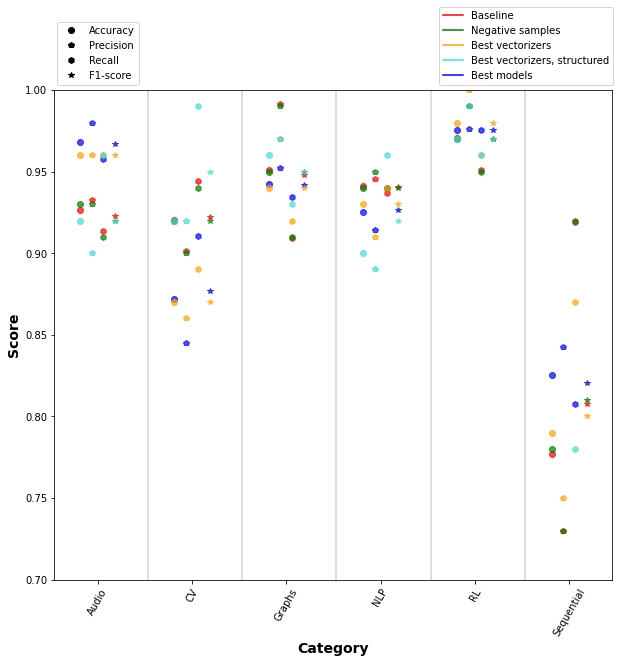

In [9]:
#labels = ['LR_CV_RU', 'LR_TFIDF_RU', 'SVC_CV_RU', 'SVC_TFIDF_RU', 'KNN_CV_RU', 'KNN_TFIDF_RU', 'RFC_CV_RU', 'RFC_TFIDF_RU', 'LSVC_CV_RU', 'LSVC_TFIDF_RU']
labels = ['Audio', 'CV', 'Graphs', 'NLP', 'RL', 'Sequential']
xticknum = len(labels)

i = 0

plt.figure(figsize=(10,10))
count = 0
for key in data1.keys():
    for ind in range(len(data1[key])):
        if count % 4 == 0:
            plt.plot(i+2, float(data1[key][ind]), 'o', alpha=0.7, c='red')
            plt.plot(i+2, float(data2[key][ind]), 'o', alpha=0.7, c='blue')
            plt.plot(i+2, float(data3[key][ind]), 'o', alpha=0.7, c='green')
            plt.plot(i+2, float(data4[key][ind]), 'o', alpha=0.7, c='orange')
            plt.plot(i+2, float(data5[key][ind]), 'o', alpha=0.7, c='turquoise')
        elif count % 4 == 1:
            plt.plot(i+2, float(data1[key][ind]), 'p', alpha=0.7, c='red')
            plt.plot(i+2, float(data2[key][ind]), 'p', alpha=0.7, c='blue')
            plt.plot(i+2, float(data3[key][ind]), 'p', alpha=0.7, c='green')
            plt.plot(i+2, float(data4[key][ind]), 'p', alpha=0.7, c='orange')
            plt.plot(i+2, float(data5[key][ind]), 'p', alpha=0.7, c='turquoise')
        elif count % 4 == 2:
            plt.plot(i+2, float(data1[key][ind]), 'h', alpha=0.7, c='red')
            plt.plot(i+2, float(data2[key][ind]), 'h', alpha=0.7, c='blue')
            plt.plot(i+2, float(data3[key][ind]), 'h', alpha=0.7, c='green')
            plt.plot(i+2, float(data4[key][ind]), 'h', alpha=0.7, c='orange')
            plt.plot(i+2, float(data5[key][ind]), 'h', alpha=0.7, c='turquoise')
        elif count % 4 == 3:
            plt.plot(i+2, float(data1[key][ind]), '*', alpha=0.7, c='red')
            plt.plot(i+2, float(data2[key][ind]), '*', alpha=0.7, c='blue')
            plt.plot(i+2, float(data3[key][ind]), '*', alpha=0.7, c='green')
            plt.plot(i+2, float(data4[key][ind]), '*', alpha=0.7, c='orange')
            plt.plot(i+2, float(data5[key][ind]), '*', alpha=0.7, c='turquoise')
        count += 1
        i += metric_count
    i += metric_count*metric_count
#plt.show()
j = 0
for u in range(len(data1.keys())-1):
    j += metric_count*metric_count*2
    plt.axvline(x = j-metric_count*2+1, ymin = 0, ymax=1, c='lightgray')

loc = []
for l in range(0, i, int(i/xticknum)):
    loc.append(l+8)

plt.xticks(loc, labels, rotation=60)
plt.xlabel('Category', size=14, weight='bold')
plt.ylabel('Score', size=14, weight='bold')
plt.ylim(0.7,1.0)
plt.subplots_adjust(bottom=0.2)

legend_elements = [Line2D([], [], marker='o', color='black', label='Accuracy', linestyle='None'),
                   Line2D([], [], marker='p', color='black', label='Precision', linestyle='None'),
                   Line2D([], [], marker='h', color='black', label='Recall', linestyle='None'),
                   Line2D([], [], marker='*', color='black', label='F1-score', linestyle='None')]

legend_elements1 = [Line2D([], [], color='red', label='Baseline'),
                   Line2D([], [], color='green', label='Negative samples'),
                   Line2D([], [], color='orange', label='Best vectorizers'),
                   Line2D([], [], color='turquoise', label='Best vectorizers, structured'),
                   Line2D([], [], color='blue', label='Best models')]

legend1 = plt.legend(handles=legend_elements1, bbox_to_anchor=(0,0,1.01,1.18))
plt.legend(handles=legend_elements, bbox_to_anchor=(0.16,0,0,1.15))
plt.gca().add_artist(legend1)
plt.savefig("../../results/plots/comparison.svg", bbox_inches='tight')
plt.show()